In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [3]:
# Configuração para visualizações
plt.style.use('ggplot')
sns.set_palette("pastel")
%matplotlib inline

# 1. Carregar os dados da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"


In [4]:
try:
    response = requests.get(url)
    response.raise_for_status()  # Verifica se houve erro na requisição
    data = response.json()
    print("Dados carregados com sucesso!")
except requests.exceptions.RequestException as e:
    print(f"Erro ao carregar dados da API: {e}")
    data = None

Dados carregados com sucesso!


In [5]:
# 2. Converter para DataFrame
if data:
    df = pd.DataFrame(data)
    print("\nInformações básicas do DataFrame:")
    print(df.info())

    # Visualizar as primeiras linhas
    print("\nPrimeiras 5 linhas do DataFrame:")
    print(df.head())
else:
    print("Não foi possível carregar os dados para criar o DataFrame.")


Informações básicas do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

Primeiras 5 linhas do DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

             


=== Análise Exploratória ===

Formato do DataFrame: (7267, 6)

Colunas disponíveis: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Estatísticas descritivas das colunas numéricas:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                             

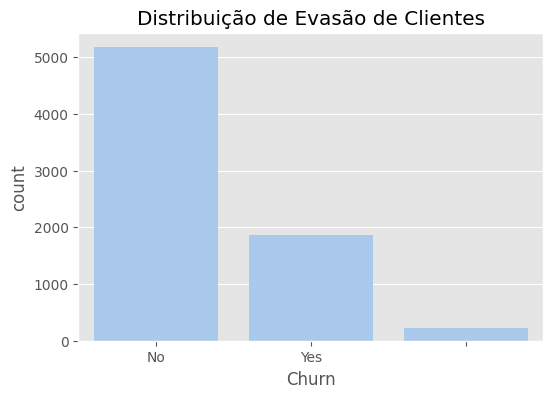

In [7]:

if 'df' in locals():
    # 3. Análise Exploratória Básica
    print("\n=== Análise Exploratória ===\n")

    # Verificar estrutura dos dados
    print("Formato do DataFrame:", df.shape)
    print("\nColunas disponíveis:", df.columns.tolist())

    # Estatísticas descritivas
    print("\nEstatísticas descritivas das colunas numéricas:")
    print(df.describe())

    # Verificar valores nulos
    print("\nValores nulos por coluna:")
    print(df.isnull().sum())

    # Análise da variável target (Churn)
    if 'Churn' in df.columns:
        print("\nDistribuição de Churn (Evasão):")
        print(df['Churn'].value_counts(normalize=True))

        plt.figure(figsize=(6, 4))
        sns.countplot(x='Churn', data=df)
        plt.title('Distribuição de Evasão de Clientes')
        plt.show()



Análise de variáveis categóricas:

Distribuição de Churn:
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


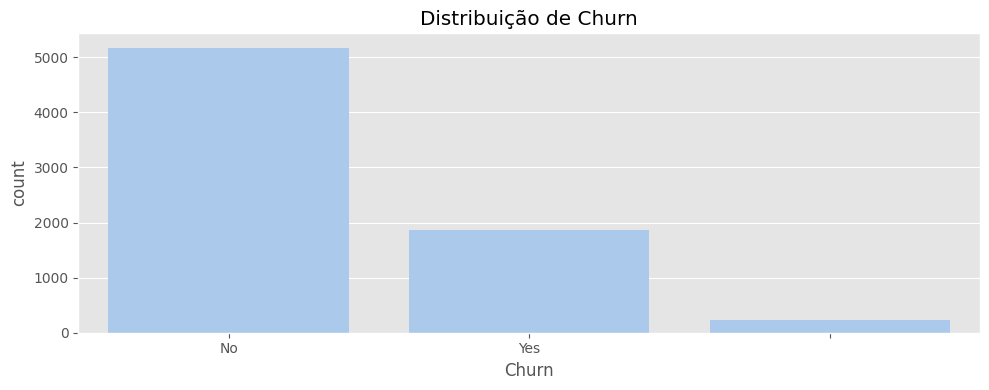


A coluna customer contém valores do tipo dicionário e será ignorada na análise.

A coluna phone contém valores do tipo dicionário e será ignorada na análise.

A coluna internet contém valores do tipo dicionário e será ignorada na análise.

A coluna account contém valores do tipo dicionário e será ignorada na análise.


In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nAnálise de variáveis categóricas:")
    for col in categorical_cols:
        if col != 'customerID':  # Pular ID do cliente
            # Verificar se os valores da coluna são strings (hashable) ou dicionários
            if df[col].apply(lambda x: isinstance(x, dict)).any():
                print(f"\nA coluna {col} contém valores do tipo dicionário e será ignorada na análise.")
                continue

            print(f"\nDistribuição de {col}:")
            print(df[col].value_counts(normalize=True))

            plt.figure(figsize=(10, 4))
            if df[col].nunique() > 5:
                # Para categorias com muitos valores, mostre apenas os top 10
                top_categories = df[col].value_counts().nlargest(10).index
                filtered_df = df[df[col].isin(top_categories)]
                sns.countplot(y=col, data=filtered_df, order=top_categories)
            else:
                sns.countplot(x=col, data=df)
            plt.title(f'Distribuição de {col}')
            plt.tight_layout()
            plt.show()

In [18]:



    # Análise de variáveis numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print("\nAnálise de variáveis numéricas:")
        for col in numeric_cols:
            plt.figure(figsize=(10, 4))
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribuição de {col}')
            plt.show()


In [19]:

    # Análise de correlação entre variáveis numéricas
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Matriz de Correlação entre Variáveis Numéricas')
        plt.show()


=== Análise de Churn por Categoria ===

Valores únicos na coluna Churn: ['No' 'Yes' '']

Aviso: A coluna 'customer' contém dicionários e será ignorada.

Aviso: A coluna 'phone' contém dicionários e será ignorada.

Aviso: A coluna 'internet' contém dicionários e será ignorada.

Aviso: A coluna 'account' contém dicionários e será ignorada.

Analisando a coluna: Churn


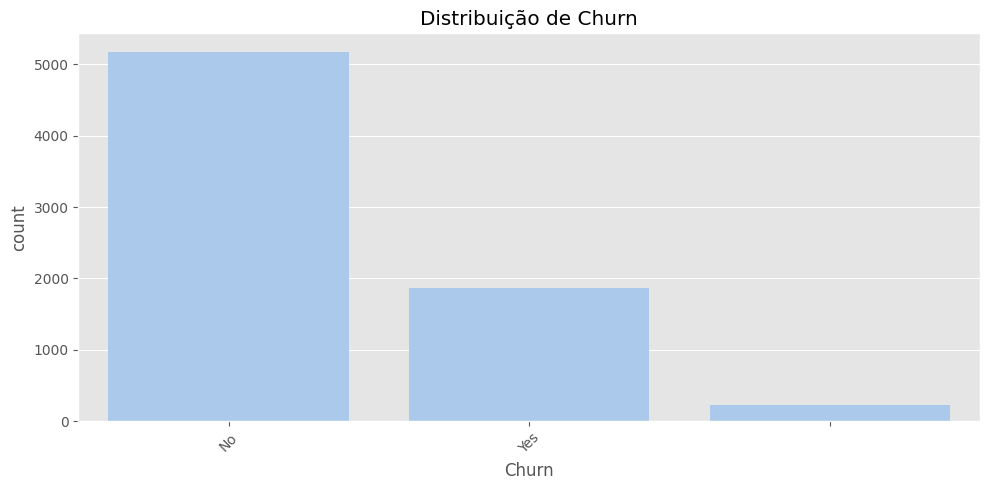

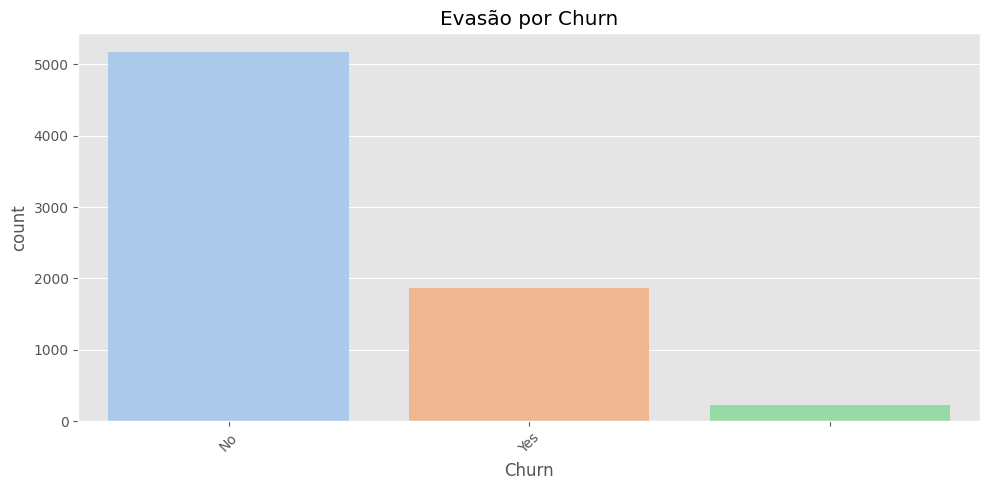


Taxa de evasão por Churn:
Churn
Yes    1.0
No     0.0
       NaN
Name: Churn_numeric, dtype: float64


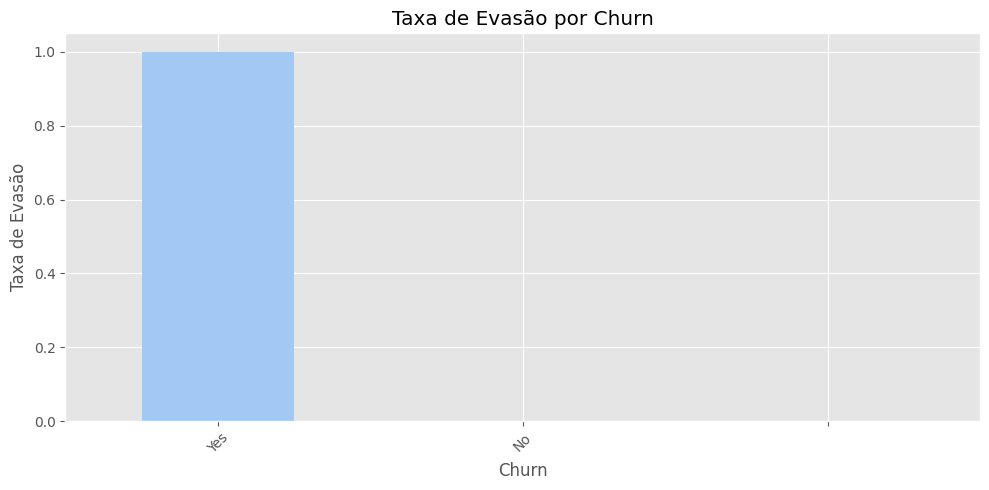


Análise concluída!


In [22]:
# Função para verificar se uma coluna contém dicionários
def contains_dicts(series):
    return series.apply(lambda x: isinstance(x, dict)).any()

# Análise de Churn por categoria - Versão robusta
if 'Churn' in df.columns:
    print("\n=== Análise de Churn por Categoria ===\n")

    # 1. Converter a coluna Churn para numérico
    if df['Churn'].dtype == object:
        print("Valores únicos na coluna Churn:", df['Churn'].unique())

        # Mapeamento genérico (ajuste conforme seus dados)
        churn_mapping = {
            'Yes': 1, 'No': 0,
            'Sim': 1, 'Não': 0,
            'True': 1, 'False': 0,
            '1': 1, '0': 0,
            '': np.nan
        }
        df['Churn_numeric'] = df['Churn'].map(churn_mapping)
    else:
        df['Churn_numeric'] = df['Churn']

    # 2. Filtrar colunas categóricas válidas
    valid_categorical_cols = []
    for col in categorical_cols:
        if col == 'customerID':
            continue

        if contains_dicts(df[col]):
            print(f"\nAviso: A coluna '{col}' contém dicionários e será ignorada.")
            continue

        if df[col].nunique() >= 10:
            print(f"\nAviso: A coluna '{col}' tem muitos valores únicos ({df[col].nunique()}) e será ignorada.")
            continue

        valid_categorical_cols.append(col)

    # 3. Análise para cada coluna válida
    for col in valid_categorical_cols:
        try:
            print(f"\nAnalisando a coluna: {col}")

            # Gráfico de distribuição
            plt.figure(figsize=(10, 5))
            sns.countplot(x=col, data=df)
            plt.title(f'Distribuição de {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            # Gráfico de Churn por categoria
            plt.figure(figsize=(10, 5))
            sns.countplot(x=col, hue='Churn', data=df)
            plt.title(f'Evasão por {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            # Taxa de Churn por categoria
            churn_rate = df.groupby(col)['Churn_numeric'].mean().sort_values(ascending=False)
            print(f"\nTaxa de evasão por {col}:")
            print(churn_rate)

            plt.figure(figsize=(10, 5))
            churn_rate.plot(kind='bar')
            plt.title(f'Taxa de Evasão por {col}')
            plt.ylabel('Taxa de Evasão')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"\nErro ao processar a coluna {col}: {str(e)}")
            continue

print("\nAnálise concluída!")